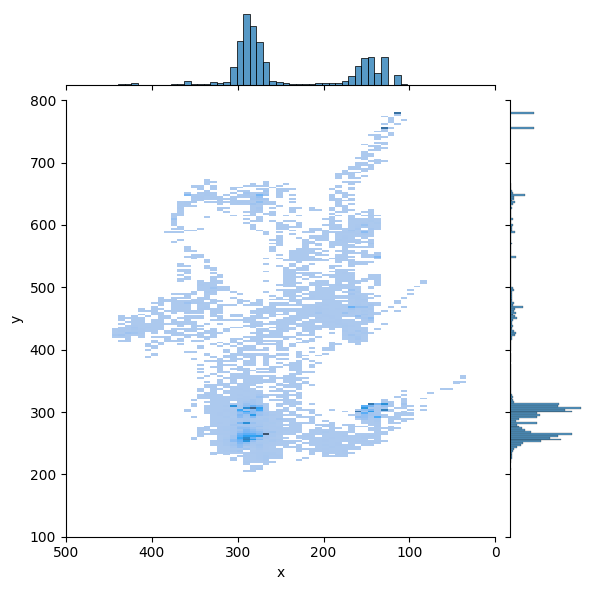

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from subprocess import check_output
import sys
sys.path.append("C:\\Users\\younw\\OneDrive\\Documents\\GitHub\\Radar_Abnormality")
import visualisation
import toCSV
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score




In [3]:
def create_feature_matrix(subjects):
    x_traindf = pd.DataFrame(columns =['dX','dY','AccX','AccY','VelX','VelY', 'Sca_Vel','Sca_Acc','Toilet_Freq','Label'])
    y_traindf = pd.DataFrame(columns =['Label','Truth'])
    lab = 0
    
    for subject in subjects:
        for i in range(1,4,1):
            data = visualisation.parse(subject,i)
            visualisation.clean_data(data)
            visualisation.create_delta(data)
            visualisation.create_scalar(data)
            visualisation.drop_column(data)
            visualisation.create_toilet_frequency(data,subject,i)
            walk_data = toCSV.make_same_size(visualisation.cut_walking(data))
            for single_walk in walk_data:
                df = pd.DataFrame(single_walk)
                df.drop("EventProcessedUtcTime",axis=1,inplace=True)
                # if(i!=2):
                #     new_row = 1
                # else:
                #     new_row = 0
                # df['Label'] = [new_row for j in range(len(single_walk))]
                # x_traindf = pd.concat([x_traindf,df], ignore_index=True)
                if(i!=2):
                    normal_matrices.append(df)
                else:
                    abnormal_matrices.append(df)

normal_matrices =[]
abnormal_matrices=[]

create_feature_matrix(['C','D','E','F','G','H','I'])

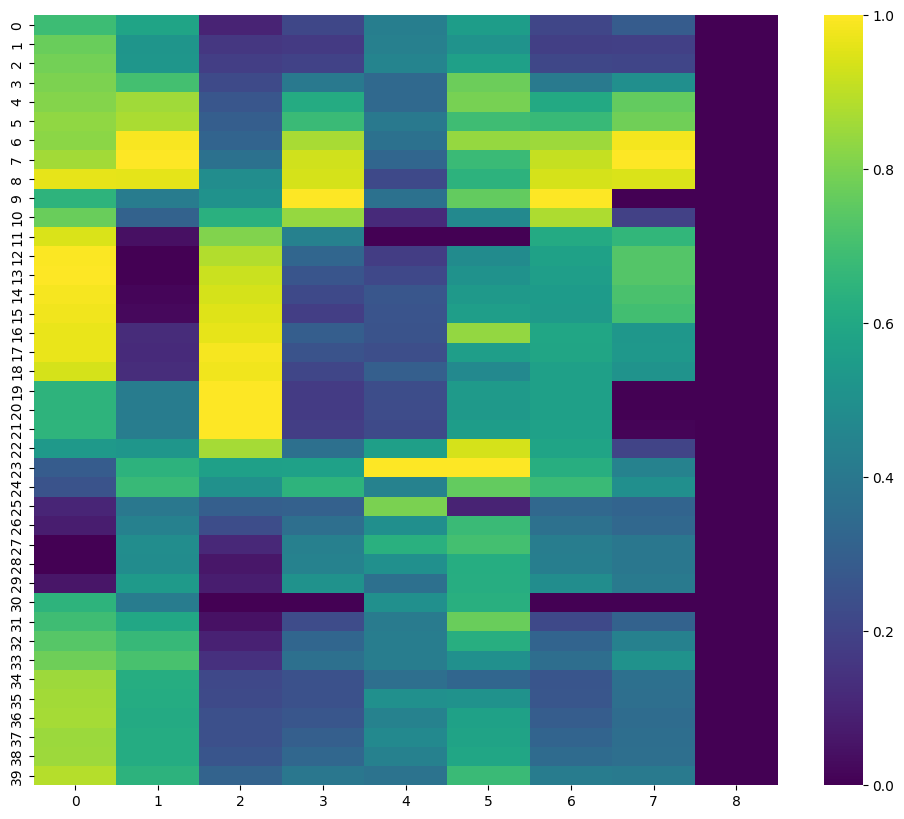

In [4]:
df = normal_matrices
plt.figure(figsize=(12, 10))
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_features = scaler.fit_transform(df[5])
df = pd.DataFrame(scaled_features)
# Creating the heatmap
sns.heatmap(df, annot=False, cmap='viridis', fmt=".2f")
plt.show()


In [5]:

def create_features(data):
    X_train = pd.DataFrame()
    # Compute mean and standard deviation for each column
    for column in ['dX', 'dY', 'AccX', 'AccY', 'Sca_Acc', 'VelX', 'VelY', 'Sca_Vel']:
        X_train[f'{column}_mean'] = [data[column].mean()]
        X_train[f'{column}_std'] = [data[column].std()]
        X_train[f'{column}_max'] = [data[column].max()]
        X_train[f'{column}_min'] = [data[column].min()]

        
    X_train['Toilet_Freq_mean'] = [data['Toilet_Freq'].mean()]
    return X_train

In [6]:
normal_fmatrices =[]
abnormal_fmatrices=[]

for matrix in normal_matrices:
    normal_fmatrices.append(create_features(matrix))
for matrix in abnormal_matrices:
    abnormal_fmatrices.append(create_features(matrix))


In [7]:
normal_fmatrices = pd.concat(normal_fmatrices, ignore_index=True)
abnormal_fmatrices = pd.concat(abnormal_fmatrices, ignore_index=True)

In [8]:
df = normal_fmatrices
df2 = abnormal_fmatrices



In [11]:
df['Class'] = 0
df2['Class'] = 1
df = pd.DataFrame(df)
df2 = pd.DataFrame(df2)

df = pd.concat([df, df2], ignore_index=True)

In [12]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df)
df = pd.DataFrame(scaled_features, columns=df.columns, index=df.index)

In [13]:
df = df.sample(frac=1, random_state=42)  # 'random_state' for reproducibility

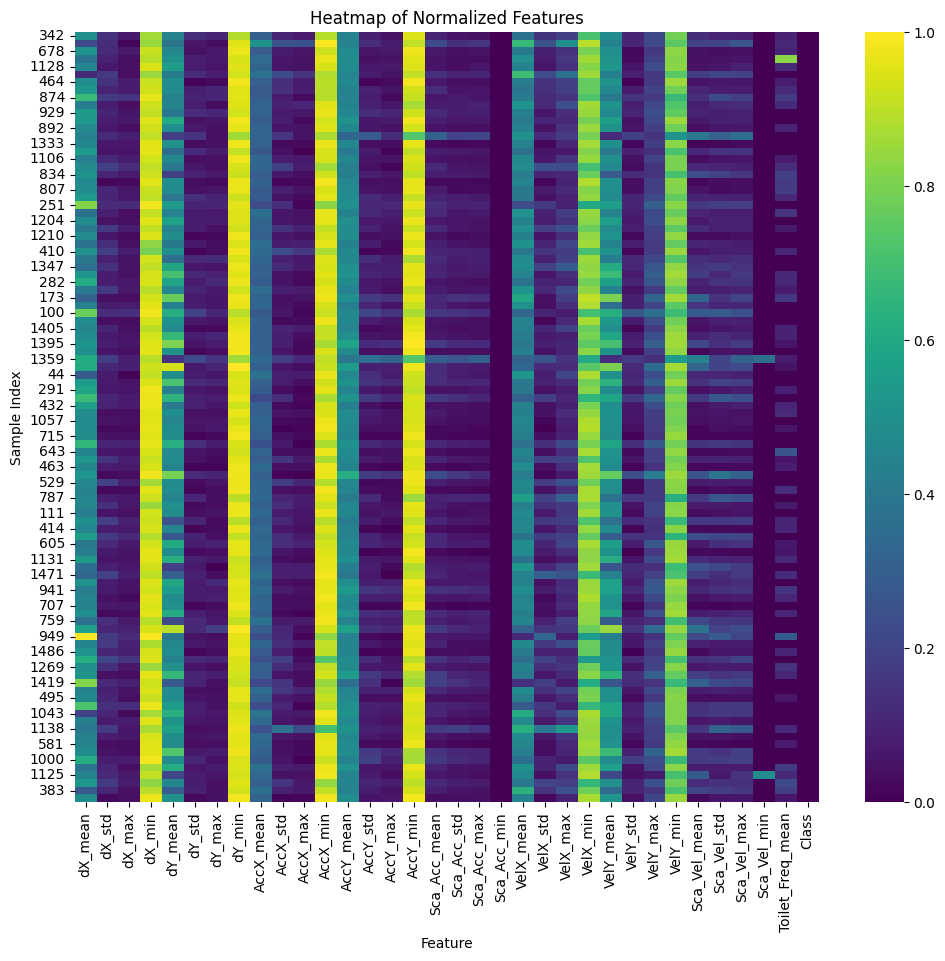

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[df['Class']==0].iloc[:100], annot=False, cmap='viridis', fmt=".2f")
plt.title('Heatmap of Normalized Features')
plt.xlabel('Feature')
plt.ylabel('Sample Index')
plt.show()


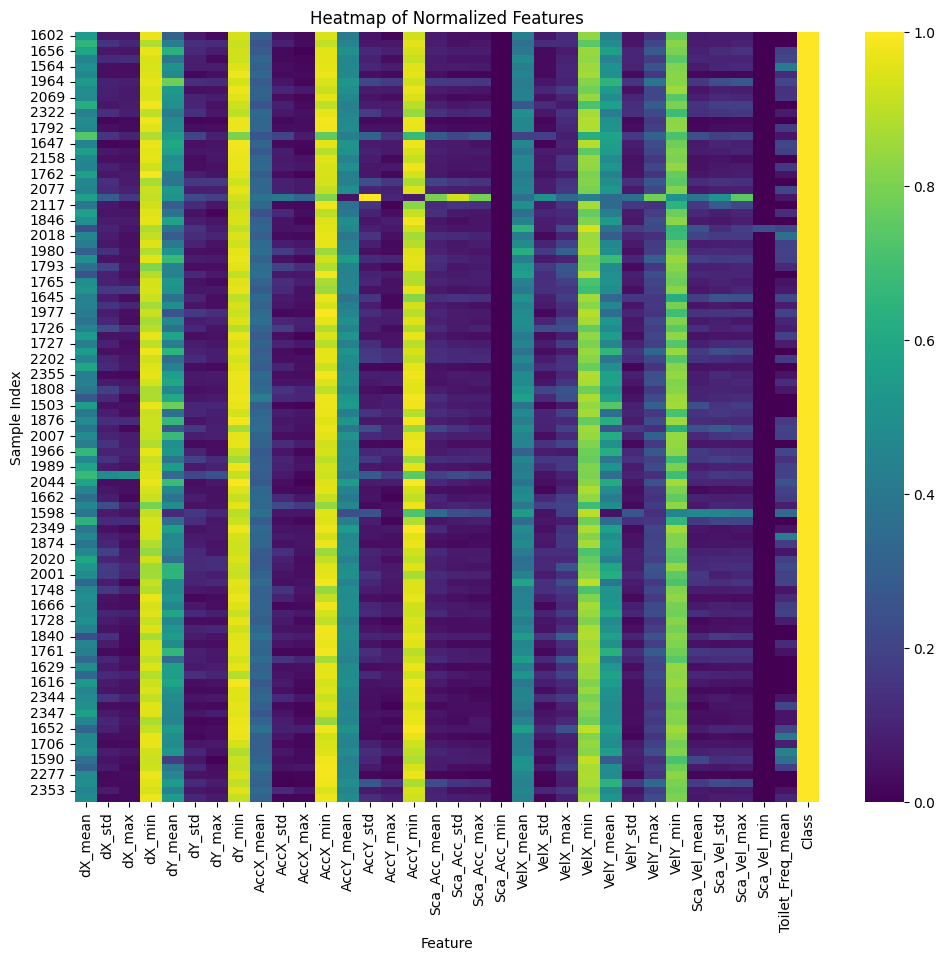

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[df['Class']==1].iloc[:100], annot=False, cmap='viridis', fmt=".2f")
plt.title('Heatmap of Normalized Features')
plt.xlabel('Feature')
plt.ylabel('Sample Index')
plt.show()


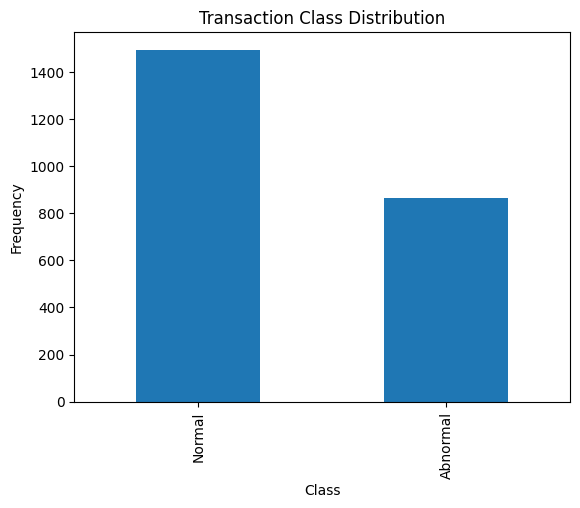

In [16]:
num_classes = pd.value_counts(df['Class'], sort = True)
num_classes.plot(kind = 'bar')
plt.title("Class Distribution")
plt.xticks(range(2), ["Normal", "Abnormal"])
plt.xlabel("Class")
plt.ylabel("Frequency")
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

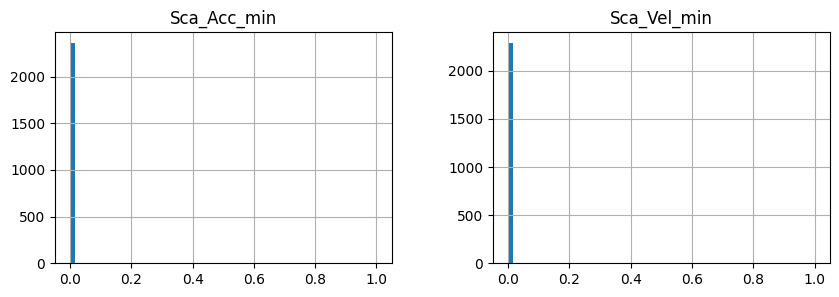

In [17]:
df[['Sca_Acc_min', 'Sca_Vel_min']].hist(figsize=(10,3), bins = 64)
plt.show()

In [18]:
df = df.drop(['Sca_Acc_min','Sca_Vel_min'],axis=1)

In [35]:
import itertools
classes = np.array(['1','0'])


def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 15,ha='center', va='center')
        horizontalalignment="center",
        color=("white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('Truth', fontsize = 13)
        plt.xlabel('Predicted', fontsize = 13)

In [36]:
df.columns
feature_df = df[['dX_mean', 'dX_std', 'dX_max', 'dX_min', 'dY_mean', 'dY_std', 'dY_max',
       'dY_min', 'AccX_mean', 'AccX_std', 'AccX_max', 'AccX_min', 'AccY_mean',
       'AccY_std', 'AccY_max', 'AccY_min', 'Sca_Acc_mean', 'Sca_Acc_std',
       'Sca_Acc_max', 'VelX_mean', 'VelX_std', 'VelX_max', 'VelX_min',
       'VelY_mean', 'VelY_std', 'VelY_max', 'VelY_min', 'Sca_Vel_mean',
       'Sca_Vel_std', 'Sca_Vel_max', 'Toilet_Freq_mean']]
X = np.asarray(feature_df)
y = np.asarray(df['Class'])


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [38]:
print(np.unique(y_test, return_counts=True))

(array([0., 1.]), array([299, 173], dtype=int64))


In [39]:
from sklearn import svm

classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)

In [40]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.68      0.96      0.80       299
         1.0       0.77      0.21      0.33       173

    accuracy                           0.69       472
   macro avg       0.73      0.59      0.57       472
weighted avg       0.71      0.69      0.63       472



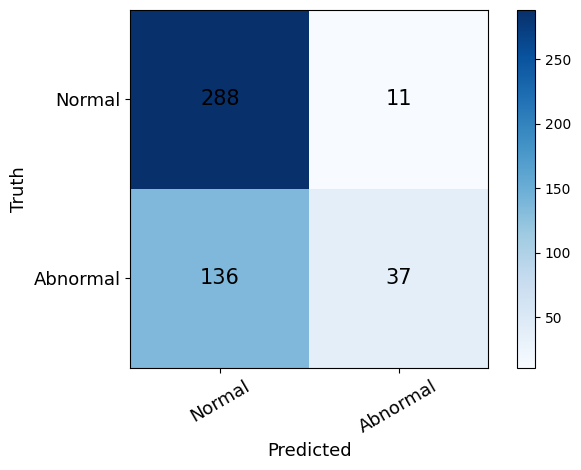

In [41]:
cm_test = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm_test,["Normal", "Abnormal"])

[0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.2682170542635659, 0.3145032051282051, 0.44273407583980895, 0.4746909389820959, 0.4799329841667547

c:\Users\younw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\younw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\younw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

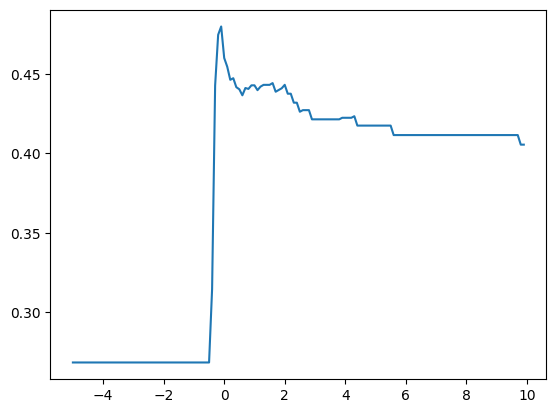

In [42]:
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
# Assuming X is your dataset
accuracies = []
# Fit a GMM
gmm = GaussianMixture(n_components=1, random_state=42)  # Adjust n_components based on your data
gmm.fit(X_train)
log_likelihood_train = gmm.score_samples(X_train)
# Compute scores (log-likelihoods)

log_likelihood_test = gmm.score_samples(X_test)

for i in range(-50,100):
    threshold = log_likelihood_train.mean() - i*0.1 * log_likelihood_train.std()  # Threshold based on training data

    y_pred = (log_likelihood_test < threshold).astype(int)  # 1 for anomalies, 0 for normal

    from sklearn.metrics import accuracy_score

    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
    macro_f1_score = np.mean(f1_score)
    accuracies.append(macro_f1_score)

print(accuracies)
plt.plot([0.1*i for i in range(-50,100)],accuracies)

plt.show()

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.73      0.66       285
         1.0       0.38      0.25      0.30       187

    accuracy                           0.54       472
   macro avg       0.49      0.49      0.48       472
weighted avg       0.51      0.54      0.51       472

Confusion Matrix:
[[207  78]
 [140  47]]


C:\Users\younw\AppData\Local\Temp\ipykernel_33084\358340202.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dim['Class'] = 0


Accuracy: 0.7254335260115607
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       173
           1       0.75      0.67      0.71       173

    accuracy                           0.73       346
   macro avg       0.73      0.73      0.72       346
weighted avg       0.73      0.73      0.72       346



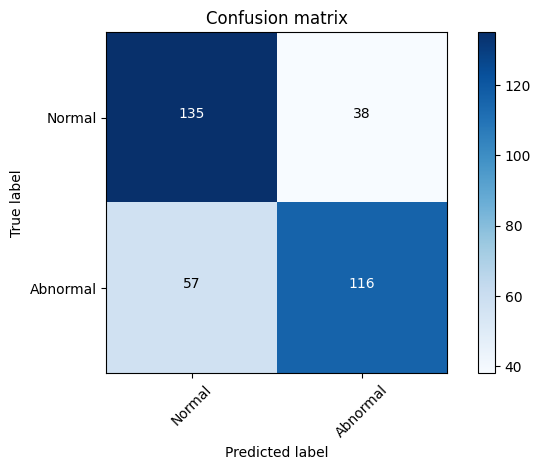

Accuracy: 0.722457627118644
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       299
           1       0.69      0.43      0.53       173

    accuracy                           0.72       472
   macro avg       0.71      0.66      0.67       472
weighted avg       0.72      0.72      0.70       472



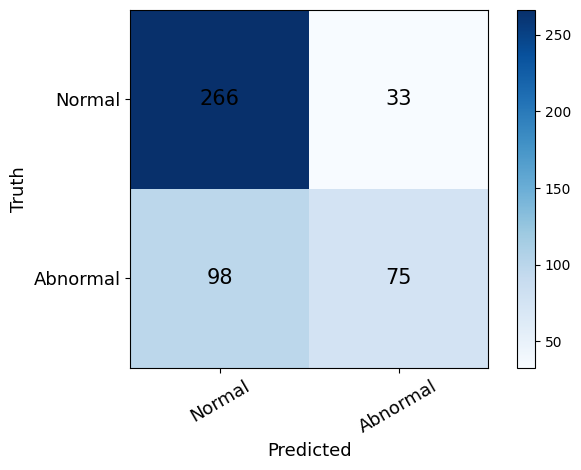

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


df = normal_fmatrices
df2 = abnormal_fmatrices
df['Class'] = 0
df2['Class'] = 1
df = pd.DataFrame(df)

df2 = pd.DataFrame(df2)
# Use pandas.concat to stack the DataFrames vertically
df = pd.concat([df, df2], ignore_index=True)
feature_df = df[['dX_mean', 'dX_std', 'dX_max', 'dX_min', 'dY_mean', 'dY_std', 'dY_max',
       'dY_min', 'AccX_mean', 'AccX_std', 'AccX_max', 'AccX_min', 'AccY_mean',
       'AccY_std', 'AccY_max', 'AccY_min', 'Sca_Acc_mean', 'Sca_Acc_std',
       'Sca_Acc_max', 'VelX_mean', 'VelX_std', 'VelX_max', 'VelX_min',
       'VelY_mean', 'VelY_std', 'VelY_max', 'VelY_min', 'Sca_Vel_mean',
       'Sca_Vel_std', 'Sca_Vel_max', 'Toilet_Freq_mean']]

X = np.asarray(feature_df)
y = np.asarray(df['Class'])
# Split the reduced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Initialize and train a classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
# Predict class labels for the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
cm_test = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_test,["Normal", "Abnormal"])
print(classification_report(y_test,y_pred))

In [44]:
count = 0
i=0
ys = []
for y in y_train:
    i+=1
    if y==0:
        count+=1
        ys.append(i)
    if(count==506):
        break

In [45]:
X_train

array([[ 0.2713417 ,  1.70698117,  4.34644967, ...,  0.08510007,
         0.29818905,  2.2604483 ],
       [ 0.48285883,  2.48505861,  8.76961499, ...,  0.12028127,
         0.42462194,  0.        ],
       [ 0.40039711,  3.75390055, 11.31300777, ...,  0.21183868,
         0.67712708,  2.51231417],
       ...,
       [-0.66065213,  2.56314494,  4.80411649, ...,  0.17674486,
         0.66889487,  2.30835338],
       [ 1.07055554,  2.80685368,  6.42020553, ...,  0.21855284,
         0.71858943,  0.        ],
       [-2.29280252,  4.22046525,  5.74977249, ...,  0.14135821,
         0.49974246,  2.85661394]])

In [46]:
y_train = np.delete(y_train,ys)
X_train = np.delete(X_train,ys,axis=0)

In [47]:
len(X_train)
len(y_train)

1380

Accuracy: 0.7372881355932204
              precision    recall  f1-score   support

           0       0.68      0.96      0.80       299
           1       0.77      0.21      0.33       173

    accuracy                           0.69       472
   macro avg       0.73      0.59      0.57       472
weighted avg       0.71      0.69      0.63       472



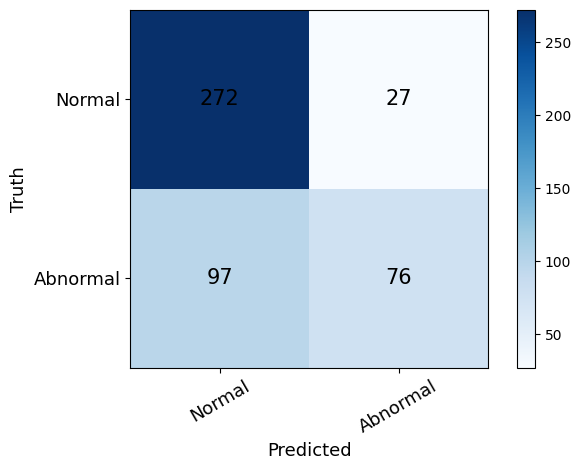

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# df_dim = normal_fmatrices[:len(abnormal_fmatrices)]
# df2 = abnormal_fmatrices
# df_dim['Class'] = 0
# df2['Class'] = 1
# df_dim = pd.DataFrame(df_dim)

# df2 = pd.DataFrame(df2)
# # Use pandas.concat to stack the DataFrames vertically
# df_dim = pd.concat([df_dim, df2], ignore_index=True)
# feature_df = df_dim[['dX_mean', 'dX_std', 'dX_max', 'dX_min', 'dY_mean', 'dY_std', 'dY_max',
#        'dY_min', 'AccX_mean', 'AccX_std', 'AccX_max', 'AccX_min', 'AccY_mean',
#        'AccY_std', 'AccY_max', 'AccY_min', 'Sca_Acc_mean', 'Sca_Acc_std',
#        'Sca_Acc_max', 'VelX_mean', 'VelX_std', 'VelX_max', 'VelX_min',
#        'VelY_mean', 'VelY_std', 'VelY_max', 'VelY_min', 'Sca_Vel_mean',
#        'Sca_Vel_std', 'Sca_Vel_max', 'Toilet_Freq_mean']]

# X = np.asarray(feature_df)
# y = np.asarray(df_dim['Class'])
# Split the reduced data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Initialize and train a classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
# Predict class labels for the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
cm_test = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_test,["Normal", "Abnormal"])
print(classification_report(y_test,y_predict))

48


c:\Users\younw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\younw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\younw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

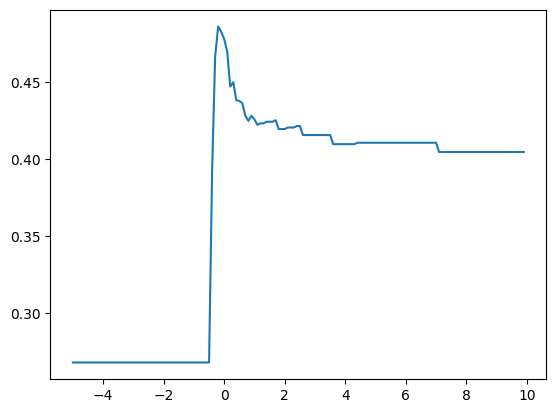

In [49]:
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
# Assuming X is your dataset
accuracies = []
# Fit a GMM
gmm = GaussianMixture(n_components=1, random_state=42)  # Adjust n_components based on your data
gmm.fit(X_train)
log_likelihood_train = gmm.score_samples(X_train)
# Compute scores (log-likelihoods)

log_likelihood_test = gmm.score_samples(X_test)

for i in range(-50,100):
    threshold = log_likelihood_train.mean() - i*0.1 * log_likelihood_train.std()  # Threshold based on training data

    y_pred = (log_likelihood_test < threshold).astype(int) 
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
    macro_f1_score = np.mean(f1_score)
    accuracies.append(macro_f1_score)

print(accuracies.index(max(accuracies)))
plt.plot([0.1*i for i in range(-50,100)],accuracies)

plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       299
           1       0.35      0.37      0.36       173

    accuracy                           0.52       472
   macro avg       0.49      0.49      0.49       472
weighted avg       0.52      0.52      0.52       472



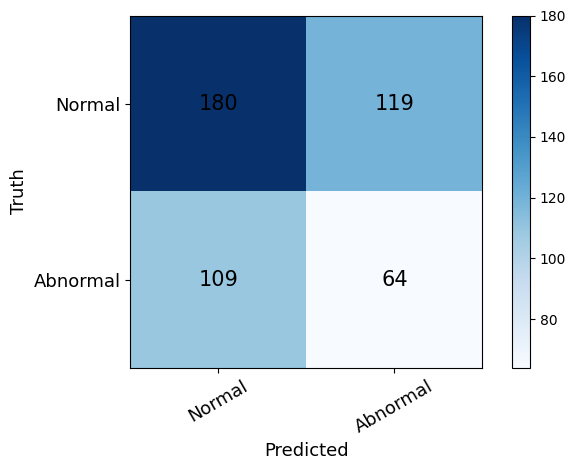

In [50]:

threshold = log_likelihood_train.mean() - (-0.2)* log_likelihood_train.std()  # Threshold based on training data

y_pred = (log_likelihood_test < threshold).astype(int)  # 1 for anomalies, 0 for normal

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)


print("Classification Report:")
print(classification_report(y_test, y_pred))

cm_test = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_test,["Normal", "Abnormal"])

